In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import statistics as st
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.model_selection import train_test_split

data=pd.read_csv('tax.csv')
data=data[data.columns[2:4]]
data.head()


,Demand,TotalRecovery
0,5.297755,4.225744
1,5.924552,4.618656
2,5.237088,4.154921
3,5.680863,4.098490
4,6.099285,5.142446


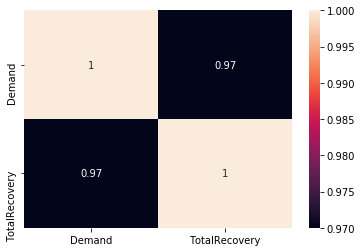

In [2]:
corr=data.corr().round(2)
sn.heatmap(data=corr, annot=True)

In [3]:
X = data['Demand'].values.reshape(-1,1)
y = data['TotalRecovery'].values.reshape(-1,1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.19157058]
[[0.77016919]]


In [6]:
y_pred = regressor.predict(X_test)

In [7]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0.154273,0.378195
1,9.305298,7.896337
2,0.596685,0.607114
3,4.154921,4.225014
4,16.769527,13.973179
5,0.268028,0.644165
6,0.214828,0.432962
7,4.718639,4.853716
8,16.268002,14.266818
9,0.532248,0.599285


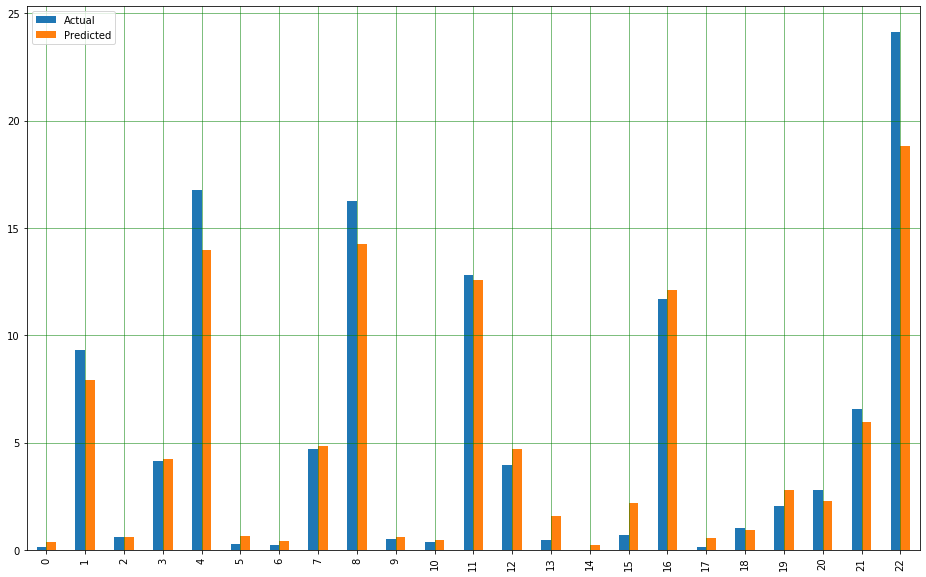

In [8]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

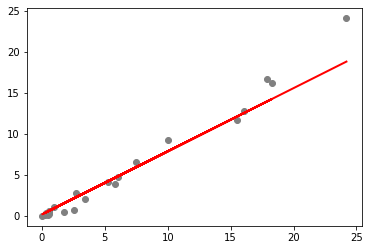

In [9]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Variance:",metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.8357969545192266
Mean Squared Error: 2.062529489536637
Root Mean Squared Error: 1.4361509285366343
Variance: 0.952777664458067
